# Gradient Boosting Regression (Linear and Second Order with Interaction Terms)

### This notebook fits the house price data using a gradient boosingt regression and uses machine learning to predict to predict the house sale price.

In [1]:
# First import relevant libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#### First iteration using a linear model

First fit the data using linear model coefficients. This will use mostly default settings for the GradientBoostingRegressor.

In [2]:
# Load transformed and normalized data:
train_GBR_Lin = pd.read_csv('train_linear.csv')

In [3]:
# Copy train data into new dataframe
train_GBR_Lin_iter1 = train_GBR_Lin.copy()

In [4]:
# Obtain a list of column names to split the data into X and y
train_GBR_Lin_iter1_col_list = train_GBR_Lin_iter1.columns.tolist()

# The first column is SalePrice (which is y), so store the remaining columns in a dataframe as X
X_GBR_Lin_iter1 = train_GBR_Lin_iter1.loc[:,train_GBR_Lin_iter1_col_list[1]:train_GBR_Lin_iter1_col_list[-1]]
# Now store the first column as y
y_GBR_Lin_iter1 = train_GBR_Lin_iter1.loc[:,train_GBR_Lin_iter1_col_list[0]]
# Split data into training and validation sets:
X_GBR_Lin_iter1_train, X_GBR_Lin_iter1_validate, y_GBR_Lin_iter1_train, y_GBR_Lin_iter1_validate = train_test_split(X_GBR_Lin_iter1,
                                                                                                                    y_GBR_Lin_iter1,
                                                                                                                    test_size = 0.2,
                                                                                                                    random_state = 42,
                                                                                                                    shuffle = True)

In [5]:
# The default value for n_estimators is 100. This is the number of boosting stages performed.
# Let's consider several different levels for n_estimators and see how they impact the validation set RMSE:
n_estimators_list = [10,25,50,75,100,150,200,250,300,400,500,600,700]
for n_estimators_eval in n_estimators_list:
    model_GBR_Lin_eval = GradientBoostingRegressor(n_estimators = n_estimators_eval, random_state = 13)
    model_GBR_Lin_eval.fit(X_GBR_Lin_iter1_train, y_GBR_Lin_iter1_train)
    y_GBR_Lin_eval_valid_predict = model_GBR_Lin_eval.predict(X_GBR_Lin_iter1_validate)
    RMSE_eval = mean_squared_error(y_GBR_Lin_iter1_validate, y_GBR_Lin_eval_valid_predict, squared = False)
    RMSE_eval_rounded = round(RMSE_eval, ndigits = 4)
    print(f'With {n_estimators_eval} boosting stages, the validation RMSE was {RMSE_eval_rounded}')

With 10 boosting stages, the validation RMSE was 0.0749
With 25 boosting stages, the validation RMSE was 0.0525
With 50 boosting stages, the validation RMSE was 0.0495
With 75 boosting stages, the validation RMSE was 0.0487
With 100 boosting stages, the validation RMSE was 0.0486
With 150 boosting stages, the validation RMSE was 0.0487
With 200 boosting stages, the validation RMSE was 0.0487
With 250 boosting stages, the validation RMSE was 0.0488
With 300 boosting stages, the validation RMSE was 0.0488
With 400 boosting stages, the validation RMSE was 0.0489
With 500 boosting stages, the validation RMSE was 0.049
With 600 boosting stages, the validation RMSE was 0.0494
With 700 boosting stages, the validation RMSE was 0.0498


In [6]:
# It looks like the default value for n_estimators (100) has the best fit based on the validation set, so stick with for this iteration
# (the next iteration of the model will train hyperparamters)

# Train & fit the actual model using the training data:
model_GBR_Lin_iter1 = GradientBoostingRegressor(n_estimators = 100, random_state = 13)
model_GBR_Lin_iter1.fit(X_GBR_Lin_iter1_train, y_GBR_Lin_iter1_train)

GradientBoostingRegressor(random_state=13)

In [7]:
# Define a function to also calculate and print RMSE and R^2 for fits of both the training and validation data
def RMSE_and_R_sq(model_results, X_train, X_validate, y_train, y_validate):
    y_train_predict = model_results.predict(X_train)
    RMSE_train = mean_squared_error(y_train, y_train_predict, squared = False)
    R_squared_train = r2_score(y_train, y_train_predict)
    print('The training set RMSE error is:', round(RMSE_train, ndigits = 4))
    print('The training set R^2 is:', round(R_squared_train, ndigits = 3))
    # validation set:
    y_validate_predict = model_results.predict(X_validate)
    RMSE_validate = mean_squared_error(y_validate, y_validate_predict, squared = False)
    R_squared_validate = r2_score(y_validate, y_validate_predict)
    print('\nThe validation set RMSE error is:', round(RMSE_validate, ndigits = 4))
    print('The validation set R^2 is:', round(R_squared_validate, ndigits = 3))
RMSE_and_R_sq(model_GBR_Lin_iter1, X_GBR_Lin_iter1_train, X_GBR_Lin_iter1_validate, y_GBR_Lin_iter1_train, y_GBR_Lin_iter1_validate)

The training set RMSE error is: 0.0324
The training set R^2 is: 0.942

The validation set RMSE error is: 0.0486
The validation set R^2 is: 0.875


In [8]:
# Define a function to plot model residuals:
def plot_residuals(model_results, X, y, model_type, model_iteration, train_validate):
    resid = y - model_results.predict(X)
    resid_plot = pd.concat([y, resid], axis = 1, ignore_index = True)
    resid_plot = resid_plot.rename(columns = {0:'Actual', 1:'Residual'})
    fig = plt.figure(figsize = [10,8])
    ax = fig.add_subplot()
    ax.scatter(x = resid_plot.Actual, y = resid_plot.Residual)
    ax.set_xlim(left = -0.02, right = 1.02)
    plt.title(f'Gradient Boosting Regression ({model_type}) {model_iteration} {train_validate} SalePrice Residuals',fontsize = 16)
    plt.xlabel('Normalized Actual SalePrice', fontsize = 14)
    plt.ylabel('Residual', fontsize = 14)
    plt.grid(alpha = 0.3)

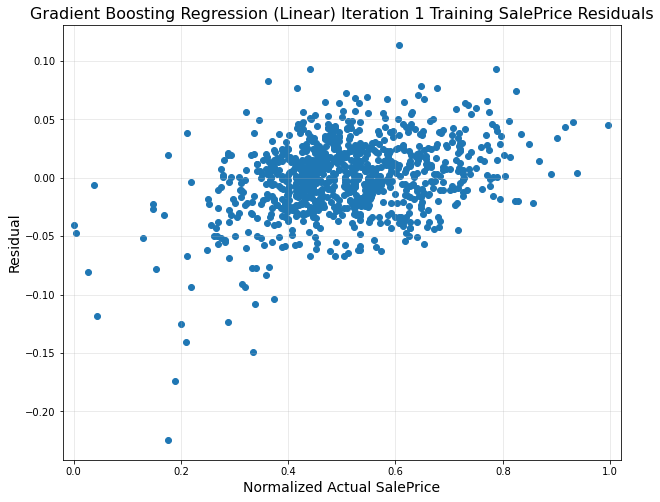

In [9]:
plot_residuals(model_GBR_Lin_iter1, X_GBR_Lin_iter1_train, y_GBR_Lin_iter1_train, 'Linear', 'Iteration 1', 'Training')

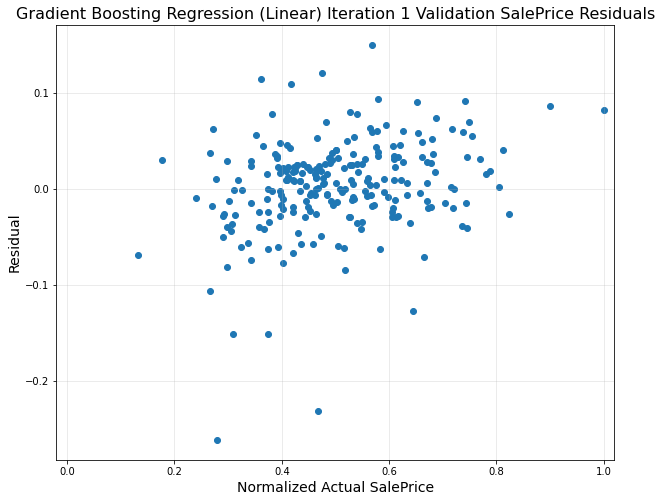

In [10]:
plot_residuals(model_GBR_Lin_iter1, X_GBR_Lin_iter1_validate, y_GBR_Lin_iter1_validate, 'Linear', 'Iteration 1', 'Validation')

Some observations:
- The training set RMSE score is higher and the validation set RMSE is lower than the first linear iteration of the random forest regression, which is promising that the gradient boosting might result in a better fit.
- A comparison of the residual plots of the two models shows similar trends.

### Second iteration using a linear model

As with the random forest regression, tuning the hyperparameters may improve the model fit.

In [11]:
# Copy train data into new dataframe
train_GBR_Lin_iter2 = train_GBR_Lin.copy()

In [12]:
# Obtain a list of column names to split the data into X and y
train_GBR_Lin_iter2_col_list = train_GBR_Lin_iter2.columns.tolist()
# The first column is SalePrice (which is y), so store the remaining columns in a dataframe as X
X_GBR_Lin_iter2 = train_GBR_Lin_iter2.loc[:,train_GBR_Lin_iter2_col_list[1]:train_GBR_Lin_iter2_col_list[-1]]
# Now store the first column as y
y_GBR_Lin_iter2 = train_GBR_Lin_iter2.loc[:,train_GBR_Lin_iter2_col_list[0]]

In [13]:
# Initialize gradient boosting regressor with the parameter that will be held constant (just random_state)
grad_boost = GradientBoostingRegressor(random_state = 13)

# Set parameter space; below is the initial (coarse) grid that was used to determine the region of interest, followed by a tighter & finer grid
# p_grid = {'n_estimators':np.linspace(50,300,6).astype(int),
#           'max_depth':np.linspace(1,8,8).astype(int),
#           'max_features':np.linspace(10,100,10).astype(int)}
p_grid = {'n_estimators':np.linspace(350,450,11).astype(int),
          'max_depth':np.linspace(1,4,4).astype(int),
          'max_features':np.linspace(50,70,11).astype(int)}

# set up k-fold (with 5 folds) cross validation
cross_val_set = KFold(n_splits = 5, shuffle = True, random_state = 13)

In [14]:
# Perform grid search of hyperparameters
grid_search_GBR_Lin_iter2 = GridSearchCV(estimator = grad_boost,
                                         param_grid = p_grid,
                                         scoring = 'neg_root_mean_squared_error',
                                         n_jobs = -1,
                                         cv = cross_val_set, return_train_score = True)
grid_search_GBR_Lin_iter2.fit(X_GBR_Lin_iter2, y_GBR_Lin_iter2)
# Store the grid search results in a data frame
grid_results_GBR_Lin_iter2 = pd.DataFrame(grid_search_GBR_Lin_iter2.cv_results_).sort_values(by = 'rank_test_score', ignore_index = True)

In [15]:
# Obtain and print the optimal parameters and corresponding training / validation RMSE
grid_n_estimators_GBR_Lin_iter2 = grid_results_GBR_Lin_iter2.loc[0, 'param_n_estimators']
grid_max_depth_GBR_Lin_iter2 = grid_results_GBR_Lin_iter2.loc[0, 'param_max_depth']
grid_max_features_GBR_Lin_iter2 = grid_results_GBR_Lin_iter2.loc[0,'param_max_features']
train_neg_RMSE_GBR_Lin_iter2 = grid_results_GBR_Lin_iter2.loc[0,'mean_train_score']
test_neg_RMSE_GBR_Lin_iter2 = grid_results_GBR_Lin_iter2.loc[0,'mean_test_score']

print('The optimal parameters were:')
print('n_estimators = ',grid_n_estimators_GBR_Lin_iter2)
print('max_features = ',grid_max_features_GBR_Lin_iter2)
print('max_depth = ',grid_max_depth_GBR_Lin_iter2)
print('The mean train k-fold RMSE was:',round(-train_neg_RMSE_GBR_Lin_iter2, ndigits = 4))
print('The mean test k-fold RMSE was:',round(-test_neg_RMSE_GBR_Lin_iter2, ndigits = 4))

The optimal parameters were:
n_estimators =  400
max_features =  52
max_depth =  2
The mean train k-fold RMSE was: 0.0309
The mean test k-fold RMSE was: 0.046


In [16]:
# Fit the model with the optimal hyperparameters
model_GBR_Lin_iter2 = GradientBoostingRegressor(n_estimators = grid_n_estimators_GBR_Lin_iter2,
                                                max_depth = grid_max_depth_GBR_Lin_iter2,
                                                max_features = grid_max_features_GBR_Lin_iter2,
                                                random_state = 13)
model_GBR_Lin_iter2.fit(X_GBR_Lin_iter2, y_GBR_Lin_iter2)

GradientBoostingRegressor(max_depth=2, max_features=52, n_estimators=400,
                          random_state=13)

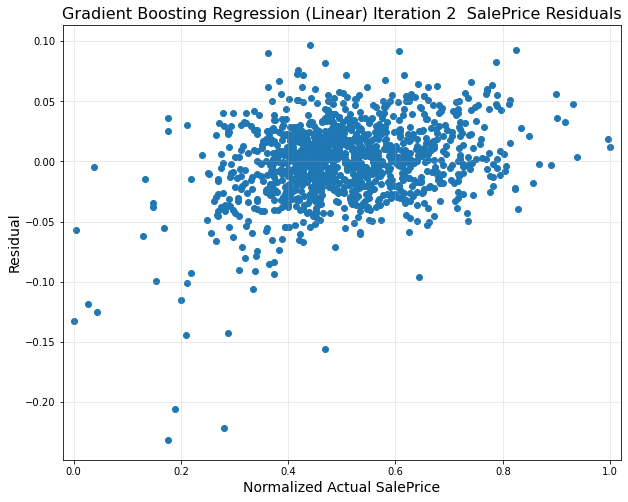

In [17]:
plot_residuals(model_GBR_Lin_iter2, X_GBR_Lin_iter2, y_GBR_Lin_iter2, 'Linear', 'Iteration 2', '')

Not much of an improvement from the hyperparameter tuning in the RMSE score. Unlike the random forest linear model, the residual plot after the tuning doesn't really appear much better. Maybe including second order with interaction terms could result in a positive impact.

### First iteration using a second order with interaction terms model

Let's see if adding second order & interaction terms can improve the model fit using gradient boosting.

In [18]:
# Load transformed and normalized data:
train_GBR_SOIR = pd.read_csv('train_sec_order.csv')

In [19]:
# Copy train data into new dataframe
train_GBR_SOIR_iter1 = train_GBR_SOIR.copy()

In [20]:
# Obtain a list of column names to split the data into X and y
train_GBR_SOIR_iter1_col_list = train_GBR_SOIR_iter1.columns.tolist()

# The first column is SalePrice (which is y), so store the remaining columns in a dataframe as X
X_GBR_SOIR_iter1 = train_GBR_SOIR_iter1.loc[:,train_GBR_SOIR_iter1_col_list[1]:train_GBR_SOIR_iter1_col_list[-1]]
# Now store the first column as y
y_GBR_SOIR_iter1 = train_GBR_SOIR_iter1.loc[:,train_GBR_SOIR_iter1_col_list[0]]
# Split data into training and validation sets:
X_GBR_SOIR_iter1_train, X_GBR_SOIR_iter1_validate, y_GBR_SOIR_iter1_train, y_GBR_SOIR_iter1_validate = train_test_split(X_GBR_SOIR_iter1,
                                                                                                                        y_GBR_SOIR_iter1,
                                                                                                                        test_size = 0.2,
                                                                                                                        random_state = 42,
                                                                                                                        shuffle = True)

In [21]:
# Let's againg consider several different levels for n_estimators and see how they impact the validation set RMSE:
n_estimators_list = [10,25,50,75,100,150,200,250,300,400,500,600,700]
for n_estimators_eval in n_estimators_list:
    model_GBR_SOIR_eval = GradientBoostingRegressor(n_estimators = n_estimators_eval, random_state = 13)
    model_GBR_SOIR_eval.fit(X_GBR_SOIR_iter1_train, y_GBR_SOIR_iter1_train)
    y_GBR_SOIR_eval_valid_predict = model_GBR_SOIR_eval.predict(X_GBR_SOIR_iter1_validate)
    RMSE_eval = mean_squared_error(y_GBR_SOIR_iter1_validate, y_GBR_SOIR_eval_valid_predict, squared = False)
    RMSE_eval_rounded = round(RMSE_eval, ndigits = 4)
    print(f'With {n_estimators_eval} boosting stages, the validation RMSE was {RMSE_eval_rounded}')

With 10 boosting stages, the validation RMSE was 0.0703
With 25 boosting stages, the validation RMSE was 0.051
With 50 boosting stages, the validation RMSE was 0.0498
With 75 boosting stages, the validation RMSE was 0.0502
With 100 boosting stages, the validation RMSE was 0.0504
With 150 boosting stages, the validation RMSE was 0.0504
With 200 boosting stages, the validation RMSE was 0.0505
With 250 boosting stages, the validation RMSE was 0.0509
With 300 boosting stages, the validation RMSE was 0.051
With 400 boosting stages, the validation RMSE was 0.0513
With 500 boosting stages, the validation RMSE was 0.0516
With 600 boosting stages, the validation RMSE was 0.0517
With 700 boosting stages, the validation RMSE was 0.052


In [22]:
# It looks like a value of 50 for n_estimators has the best fit based on the validation set this time, so use that for this iteration
# (again, the next iteration of the model will train hyperparamters)

# Train & fit the actual model using the training data:
model_GBR_SOIR_iter1 = GradientBoostingRegressor(n_estimators = 50, random_state = 13) # no n_jobs parameter???
model_GBR_SOIR_iter1.fit(X_GBR_SOIR_iter1_train, y_GBR_SOIR_iter1_train)

GradientBoostingRegressor(n_estimators=50, random_state=13)

In [23]:
RMSE_and_R_sq(model_GBR_SOIR_iter1, X_GBR_SOIR_iter1_train, X_GBR_SOIR_iter1_validate, y_GBR_SOIR_iter1_train, y_GBR_SOIR_iter1_validate)

The training set RMSE error is: 0.036
The training set R^2 is: 0.928

The validation set RMSE error is: 0.0498
The validation set R^2 is: 0.869


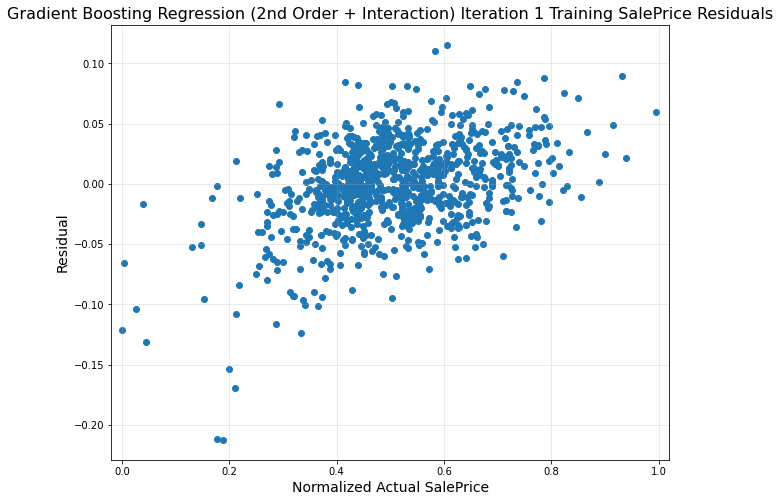

In [24]:
plot_residuals(model_GBR_SOIR_iter1, X_GBR_SOIR_iter1_train, y_GBR_SOIR_iter1_train, '2nd Order + Interaction', 'Iteration 1', 'Training')

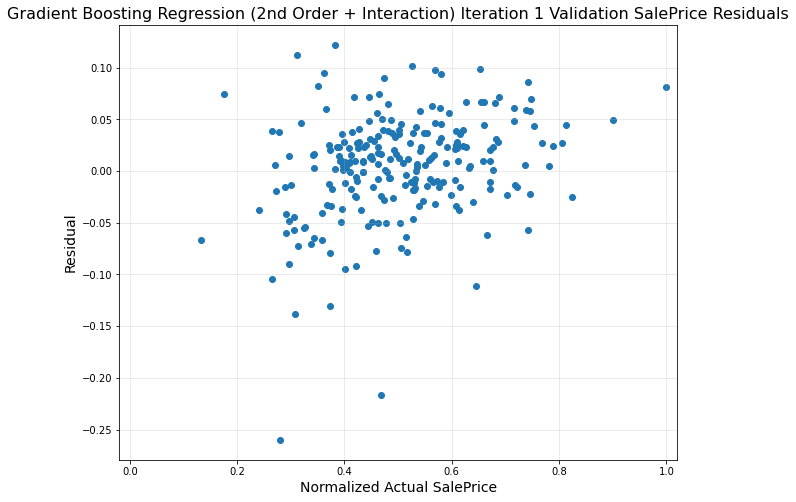

In [25]:
plot_residuals(model_GBR_SOIR_iter1, X_GBR_SOIR_iter1_validate, y_GBR_SOIR_iter1_validate, '2nd Order + Interaction', 'Iteration 1', 'Validation')

The RMSE scores using the training and validation set for the second order with interaction term regression are worse than the linear regression model. This is in contrast to the random forest regressions, where adding the higher order terms (without tuning) slightly improved the model fit. Perhaps hyperparameter tuning could help.

### Second iteration using a second order with interaction terms model
Once again, tune hyperparameters

In [26]:
# Copy train data into new dataframe
train_GBR_SOIR_iter2 = train_GBR_SOIR.copy()

In [27]:
# Obtain a list of column names to split the data into X and y
train_GBR_SOIR_iter2_col_list = train_GBR_SOIR_iter2.columns.tolist()
# The first column is SalePrice (which is y), so store the remaining columns in a dataframe as X
X_GBR_SOIR_iter2 = train_GBR_SOIR_iter2.loc[:,train_GBR_SOIR_iter2_col_list[1]:train_GBR_SOIR_iter2_col_list[-1]]
# Now store the first column as y
y_GBR_SOIR_iter2 = train_GBR_SOIR_iter2.loc[:,train_GBR_SOIR_iter2_col_list[0]]

In [28]:
# Initialize gradient boosting regressor with the parameter that will be held constant (just random_state)
grad_boost = GradientBoostingRegressor(random_state = 13)

# Set parameter space; below is the initial (coarse) grid that was used to determine the region of interest, followed by a tighter & finer grid
# p_grid = {'n_estimators':np.linspace(25,325,7).astype(int),
#           'max_depth':np.linspace(1,8,8).astype(int),
#           'max_features':np.linspace(10,100,10).astype(int)}
p_grid = {'n_estimators':np.linspace(170,190,11).astype(int),
          'max_depth':np.linspace(2,5,4).astype(int),
          'max_features':np.linspace(2,20,10).astype(int)}

# set up k-fold (with 5 folds) cross validation
cross_val_set = KFold(n_splits = 5, shuffle = True, random_state = 13)

In [29]:
# Perform grid search of hyperparameters
grid_search_GBR_SOIR_iter2 = GridSearchCV(estimator = grad_boost,
                                          param_grid = p_grid,
                                          scoring = 'neg_root_mean_squared_error',
                                          n_jobs = -1,
                                          cv = cross_val_set, return_train_score = True)
grid_search_GBR_SOIR_iter2.fit(X_GBR_SOIR_iter2, y_GBR_SOIR_iter2)
# Store the grid search results in a data frame
grid_results_GBR_SOIR_iter2 = pd.DataFrame(grid_search_GBR_SOIR_iter2.cv_results_).sort_values(by = 'rank_test_score', ignore_index = True)

In [30]:
# Obtain and print the optimal parameters and corresponding training / validation RMSE
grid_n_estimators_GBR_SOIR_iter2 = grid_results_GBR_SOIR_iter2.loc[0, 'param_n_estimators']
grid_max_depth_GBR_SOIR_iter2 = grid_results_GBR_SOIR_iter2.loc[0, 'param_max_depth']
grid_max_features_GBR_SOIR_iter2 = grid_results_GBR_SOIR_iter2.loc[0,'param_max_features']
train_neg_RMSE_GBR_SOIR_iter2 = grid_results_GBR_SOIR_iter2.loc[0,'mean_train_score']
test_neg_RMSE_GBR_SOIR_iter2 = grid_results_GBR_SOIR_iter2.loc[0,'mean_test_score']

print('The optimal parameters were:')
print('n_estimators = ',grid_n_estimators_GBR_SOIR_iter2)
print('max_features = ',grid_max_features_GBR_SOIR_iter2)
print('max_depth = ',grid_max_depth_GBR_SOIR_iter2)
print('The mean train k-fold RMSE was:',round(-train_neg_RMSE_GBR_SOIR_iter2, ndigits = 4))
print('The mean test k-fold RMSE was:',round(-test_neg_RMSE_GBR_SOIR_iter2, ndigits = 4))

The optimal parameters were:
n_estimators =  182
max_features =  12
max_depth =  4
The mean train k-fold RMSE was: 0.02
The mean test k-fold RMSE was: 0.0471


In [31]:
# Fit the model with the optimal hyperparameters
model_GBR_SOIR_iter2 = GradientBoostingRegressor(n_estimators = grid_n_estimators_GBR_SOIR_iter2,
                                                 max_depth = grid_max_depth_GBR_SOIR_iter2,
                                                 max_features = grid_max_features_GBR_SOIR_iter2,
                                                 random_state = 13)
model_GBR_SOIR_iter2.fit(X_GBR_SOIR_iter2, y_GBR_SOIR_iter2)

GradientBoostingRegressor(max_depth=4, max_features=12, n_estimators=182,
                          random_state=13)

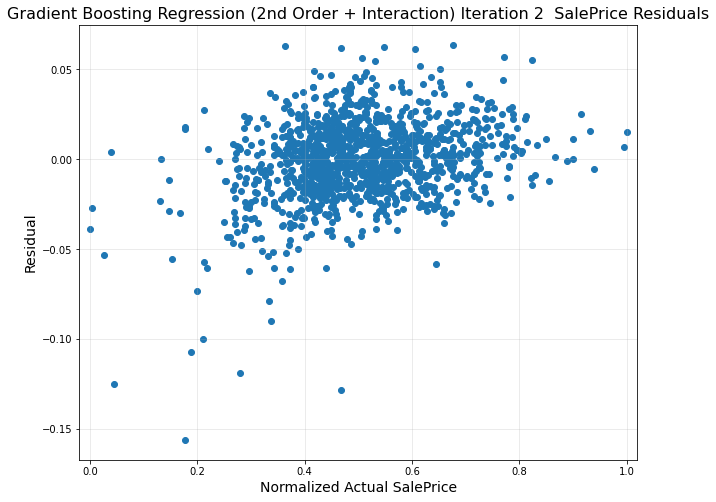

In [32]:
plot_residuals(model_GBR_SOIR_iter2, X_GBR_SOIR_iter2, y_GBR_SOIR_iter2, '2nd Order + Interaction', 'Iteration 2', '')

Both the RMSE scores and the residuals show improvement following model tuning, so it looks like the mainly default conditions used in the first iteration had plently of room for improvement.

#### Summary of the validation (mean k-fold where appropriate) RMSE and test set scores:

| Model Iteration | Validation Set RMSE | Test Set Score (log RMSE) |
| --- | -: | -: |
| Linear Iteration 1 | 0.0486 | 0.15328 |
| Linear Iteration 2 | 0.0460 | 0.15173 |
| 2nd Order + Interactions Iteration 1 | 0.0498 | 0.14838 |
| 2nd Order + Interactions Iteration 2 | 0.0471 | 0.14669 |

Overall the validation set RMSE scores are lower using gradient boosting than when a random forest was used. This trend also carries over to the test set scores. Although the test set trends still don't necessarily agree with the validation set indications, it is clear that the introduction of the second order & interaction terms is beneficial for improving the fit (observed with both random forests and gradient boosting). Hyperparameter tuning also improved the fit quality of both model types for gradient boosting, whereas an improvement was only observed after tuning the linear random forest model.